### Exercise 5

<div class="alert-success">
    
1. **Get a polygons map of the lowest administrative unit possible. : distrito**
    
2. Get a **table of variables for those units**. At least 3 numerical variables. densidad poblacion, indice de contaminacion  indice de probreza, etc**
    poblacion y superficie no considerar para las 3 varibles cuanti

3. **Preprocess both tables and get them ready for merging.**

4. **Do the merging, making the changes needed so that you keep the most columns.**
    el ejercicio ess juntar la data con la tabla de datos, no hay ningun calculo
    
    
</div>

In [232]:
from  fiona import listlayers
import os

argentinaMaps=os.path.join('maps','argentina22171','argentinaMaps22171_all3.gpkg')

#layers in maps
listlayers(argentinaMaps)

['country',
 'cities',
 'rivers',
 'states',
 'municipalities',
 'border',
 'airports']

In [233]:
# reading in the data:
import os
import geopandas as gpd

country=gpd.read_file(argentinaMaps,layer='country')
states=gpd.read_file(argentinaMaps,layer='states')
municipalities=gpd.read_file(argentinaMaps,layer='municipalities')


In [234]:
# data table
import pandas as pd

argData=os.path.join('data','base_datos_3_varl.xlsx')
base_datos=pd.read_excel(argData,
                     dtype={'Ubigeo': object})
base_datos.info()
#hasta ahora solo hemos trabajado con su geometria no con su data
#tengo q hacer un merge: o sea meter la data dentro del poligono

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Provincia              23 non-null     object
 1   IDH_2019               23 non-null     object
 2   muertes_Tuberculosis   23 non-null     int64 
 3   Pobreza_personas(%)    23 non-null     object
 4   Año                    23 non-null     int64 
 5   Pais                   23 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.2+ KB


In [235]:
base_datos.head()

,Provincia,IDH_2019,muertes_Tuberculosis,Pobreza_personas(%),Año,Pais
0,Ciudad Autónoma de Buenos Aires,"0,882",28,"1,3",2019,Argentina
1,Buenos Aires,"0,842",209,"11,3",2019,Argentina
2,Córdoba,"0,858",19,"7,9",2019,Argentina
3,Entre Ríos,"0,836",5,"3,4",2019,Argentina
4,Santa Fe,"0,841",25,"3,5",2019,Argentina


In [236]:
base_datos.rename(columns={'Pobreza_personas(%)':'Pobreza_porcentaje'},inplace=True)
base_datos.head()

,Provincia,IDH_2019,muertes_Tuberculosis,Pobreza_porcentaje,Año,Pais
0,Ciudad Autónoma de Buenos Aires,"0,882",28,"1,3",2019,Argentina
1,Buenos Aires,"0,842",209,"11,3",2019,Argentina
2,Córdoba,"0,858",19,"7,9",2019,Argentina
3,Entre Ríos,"0,836",5,"3,4",2019,Argentina
4,Santa Fe,"0,841",25,"3,5",2019,Argentina


In [237]:
# map
#import geopandas as gpd

#peruDataDist=os.path.join('miningGDF',"maps","DistritosMap.zip")

#datadismap=gpd.read_file(peruDataDist)

states.head()

,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,geometry
0,Argentina,AR,Buenos Aires,AR006,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...
1,Argentina,AR,Catamarca,AR010,"POLYGON Z ((1906189.076 7204695.456 0.000, 191..."
2,Argentina,AR,Chaco,AR022,"POLYGON Z ((2494292.791 7296258.081 0.000, 249..."
3,Argentina,AR,Chubut,AR026,MULTIPOLYGON Z (((1916196.919 4975824.860 0.00...
4,Argentina,AR,Ciudad de Buenos Aires,AR002,"POLYGON Z ((2747577.276 6094399.410 0.000, 274..."


In [238]:
#rename
states.rename(columns={'ADM1_ES':'Provincia', 'ADM0_ES':'Pais'},inplace=True)
states.head()

,Pais,ADM0_PCODE,Provincia,ADM1_PCODE,geometry
0,Argentina,AR,Buenos Aires,AR006,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...
1,Argentina,AR,Catamarca,AR010,"POLYGON Z ((1906189.076 7204695.456 0.000, 191..."
2,Argentina,AR,Chaco,AR022,"POLYGON Z ((2494292.791 7296258.081 0.000, 249..."
3,Argentina,AR,Chubut,AR026,MULTIPOLYGON Z (((1916196.919 4975824.860 0.00...
4,Argentina,AR,Ciudad de Buenos Aires,AR002,"POLYGON Z ((2747577.276 6094399.410 0.000, 274..."


In [239]:
provinciasGDF = states.loc[:,['Provincia','geometry', 'Pais']]
provinciasGDF

,Provincia,geometry,Pais
0,Buenos Aires,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...,Argentina
1,Catamarca,"POLYGON Z ((1906189.076 7204695.456 0.000, 191...",Argentina
2,Chaco,"POLYGON Z ((2494292.791 7296258.081 0.000, 249...",Argentina
3,Chubut,MULTIPOLYGON Z (((1916196.919 4975824.860 0.00...,Argentina
4,Ciudad de Buenos Aires,"POLYGON Z ((2747577.276 6094399.410 0.000, 274...",Argentina
5,Córdoba,"POLYGON Z ((2288373.932 6695803.079 0.000, 228...",Argentina
6,Corrientes,MULTIPOLYGON Z (((3004612.053 6855238.635 0.00...,Argentina
7,Entre Ríos,"POLYGON Z ((2798505.825 6586816.825 0.000, 279...",Argentina
8,Formosa,"POLYGON Z ((2497424.367 7484757.793 0.000, 249...",Argentina
9,Jujuy,"POLYGON Z ((2098377.586 7581146.835 0.000, 210...",Argentina


In [240]:
# all capitals, no empty spaces before or after.

capitalizeColumns=lambda x: x.str.upper().str.strip()
base_datos[['Provincia']]=base_datos[['Provincia']].apply(capitalizeColumns)
provinciasGDF[['Provincia']]=provinciasGDF[['Provincia']].apply(capitalizeColumns)

In [241]:
!pip install unidecode

Defaulting to user installation because normal site-packages is not writeable


In [242]:
import unidecode


byePunctuation=lambda x: unidecode.unidecode(x)
base_datos[['Provincia']]=base_datos[['Provincia']].applymap(byePunctuation)  #applymap for olderpandas para colab
provinciasGDF[['Provincia']]=provinciasGDF[['Provincia']].applymap(byePunctuation) #applymap for olderpandas

In [243]:
#encontrenmos los que nos coinciden
nomatch_df=set(base_datos.Provincia)- set(provinciasGDF.Provincia)
nomatch_gdf=set(provinciasGDF.Provincia)-set(base_datos.Provincia) 

In [244]:
len(nomatch_df), len(nomatch_gdf)

(1, 2)

In [245]:
# pick the closest match from nomatch_gdf for a value in nomatch_df
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]
#noto que no hay nada q ambiar a mano entonces creo mi diccionario

[('CIUDAD AUTONOMA DE BUENOS AIRES', ('CIUDAD DE BUENOS AIRES', 95))]

In [246]:
{dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

{'CIUDAD AUTONOMA DE BUENOS AIRES': 'CIUDAD DE BUENOS AIRES'}

In [247]:
# then:
changesDis_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}
changesDis_df

{'CIUDAD AUTONOMA DE BUENOS AIRES': 'CIUDAD DE BUENOS AIRES'}

In [248]:
datadis.Provincia.replace(changesDis_df,inplace=True)

In [249]:
provinciasGDF2=provinciasGDF.merge(base_datos, on='Provincia')
# check
provinciasGDF2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Provincia              22 non-null     object  
 1   geometry               22 non-null     geometry
 2   Pais_x                 22 non-null     object  
 3   IDH_2019               22 non-null     object  
 4   muertes_Tuberculosis   22 non-null     int64   
 5   Pobreza_porcentaje     22 non-null     object  
 6   Año                    22 non-null     int64   
 7   Pais_y                 22 non-null     object  
dtypes: geometry(1), int64(2), object(5)
memory usage: 1.5+ KB


In [250]:
bye=['Año','Pais_y']
provinciasGDF2.drop(columns=bye,inplace=True)
provinciasGDF2.rename(columns={'Pais_x':'Pais'},inplace=True)
# keeping
provinciasGDF2.head()

,Provincia,geometry,Pais,IDH_2019,muertes_Tuberculosis,Pobreza_porcentaje
0,BUENOS AIRES,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...,Argentina,"0,842",209,"11,3"
1,CATAMARCA,"POLYGON Z ((1906189.076 7204695.456 0.000, 191...",Argentina,"0,844",2,"6,8"
2,CHACO,"POLYGON Z ((2494292.791 7296258.081 0.000, 249...",Argentina,"0,808",7,"4,4"
3,CHUBUT,MULTIPOLYGON Z (((1916196.919 4975824.860 0.00...,Argentina,"0,858",9,"7,6"
4,CORDOBA,"POLYGON Z ((2288373.932 6695803.079 0.000, 228...",Argentina,"0,858",19,"7,9"


In [251]:
#provinciasGDF2= gpd.GeoDataFrame(provinciasGDF2, crs = 4326)
#provinciasGDF21= provinciasGDF2.to_crs(22171)
#type(provinciasGDF2)

In [252]:
#tablaMergeadas=states.merge(datadis, left_on='Provincia', right_on='Provincia')
#tablaMergeadas

In [253]:
#tablaMergeadas.info()

In [254]:
#states.merge(datadis, left_on='Provincia', right_on='Provincia').shape

In [255]:
#datadis.Provincia

In [256]:
#states.Provincia

In [257]:
#datadis.Provincia.duplicated().sum(),states.Provincia.duplicated().sum()

In [258]:
# concatenating
#datadis['provDist']=["+".join(pd) for pd in zip (datadis.Provincia)]
#datadismap['provDist']=["+".join(pd) for pd in zip (datadismap.Provincia)]

### Exercise 6

<div class="alert-success">
    
1. Choose a numeric variable from your merged data.
2. Decide which is the  best classification scheme for that variable.
3. Make a map for the best scheme.
4. Make a histogram for the best scheme.
</div>

In [262]:
# statistics
provinciasGDF2.IDH_2019.describe()

count        22
unique       16
top       0,842
freq          2
Name: IDH_2019, dtype: object

In [267]:
#IDH_2019_float=[float(variable) for variable in provinciasGDF2['IDH_2019']]

In [269]:
import re
commaToDotP=lambda xString:float(re.sub(",",".",xString))
#provinciasGDF2.IDH_2019.apply(commaToDotP)
provinciasGDF2[['IDH_2019','Pobreza_porcentaje']]=provinciasGDF2.loc[:,['IDH_2019','Pobreza_porcentaje']].applymap(commaToDotP)

In [270]:
provinciasGDF2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Provincia              22 non-null     object  
 1   geometry               22 non-null     geometry
 2   Pais                   22 non-null     object  
 3   IDH_2019               22 non-null     float64 
 4   muertes_Tuberculosis   22 non-null     int64   
 5   Pobreza_porcentaje     22 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 1.2+ KB


In [213]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [280]:
import mapclassify#esto no tien q ver con la data espacial ino cortes con la data numerica 
import numpy as np  #es uuna manera de decir equal interval

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=provinciasGDF2['Pobreza_porcentaje']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)
#para calcular el error

In [271]:
# Probaremos hacer 6 intervalos
import mapclassify#esto no tien q ver con la data espacial ino cortes con la data numerica 
import numpy as np  #es uuna manera de decir equal interval

np.random.seed(12345) # so we all get the same results!
K=5
variable=provinciasGDF2['Pobreza_porcentaje']
ei6 = mapclassify.EqualInterval(variable, k=K)
msd = mapclassify.StdMean(variable)                             
q6=mapclassify.Quantiles(variable,k=K)
mb6 = mapclassify.MaximumBreaks(variable, k=K)
ht = mapclassify.HeadTailBreaks(variable)
fj6 = mapclassify.FisherJenks(variable, k=K)
jc6 = mapclassify.JenksCaspall(variable, k=K)
mp6 = mapclassify.MaxP(variable, k=K)

C:\ProgramData\anaconda3\envs\SDS_Mi_ambiente_Romina\Lib\site-packages\IPython\core\interactiveshell.py:3508: UserWarning: Numba not installed. Using slow pure python version.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [281]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in clase6])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['Classifier'] = [c.name for c in class5]
adcms.rename(columns={0:'ADCM'},inplace=True)
# see the value
adcms #este es para ver el error

,ADCM,Classifier
0,12.7,Quantiles
1,8.6,EqualInterval
2,16.9,StdMean
3,13.6,HeadTailBreaks
4,8.6,MaximumBreaks
5,6.5,FisherJenks
6,6.5,JenksCaspall
7,12.7,MaxP


In [286]:
#el jenk caspall y el FisherJenks tienen el error mas pequeño
provinciasGDF2['Pobreza_porcentaje_jc5'] = jc5.yb

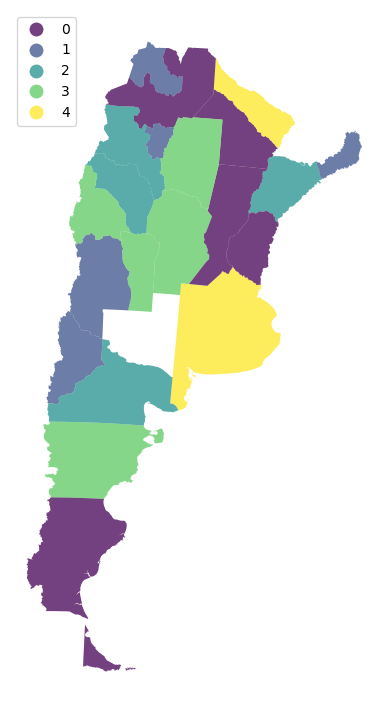

In [287]:
# Ahora, se grafica el mapa con las clasificaciones
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
provinciasGDF2.plot(column='Pobreza_porcentaje_jc5', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

In [ ]:
#Histograma

In [288]:
jc5_bins=list(jc5.bins)

<Axes: xlabel='Pobreza_porcentaje', ylabel='Count'>

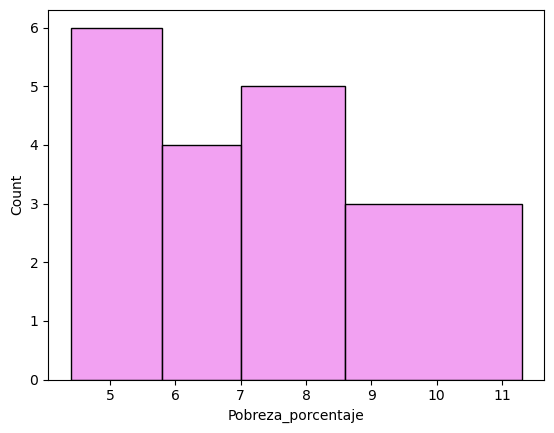

In [292]:
import seaborn as sea
sea.histplot(provinciasGDF2.Pobreza_porcentaje, bins=jc5_bins,color='violet')

### Exercise 7

<div class="alert-success">
        
Compute the neighbors of the capital of your country. Plot the results for each of the options. (calcula la distcnia rook queen y knn)
    
</div>

In [296]:
!pip install libpysal

Defaulting to user installation because normal site-packages is not writeable


In [297]:
from libpysal.weights import Queen, Rook, KNN

# rook
w_rook = Rook.from_dataframe(provinciasGDF2,use_index=False) 

In [298]:
# queen
w_queen = Queen.from_dataframe(provinciasGDF2,use_index=False)

In [299]:
# k nearest neighbors
w_knn = KNN.from_dataframe(provinciasGDF2, k=4)#dime cuales son los 4 poligonos
#si es el mapa de un pais usar el rook o el queen
#en el otro caso depende q suspunto slos hayan graficado

In [300]:
# first district in the GDF:
provinciasGDF2.head(1)

,Provincia,geometry,Pais,IDH_2019,muertes_Tuberculosis,Pobreza_porcentaje,Pobreza_porcentaje_jc5
0,BUENOS AIRES,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...,Argentina,0.842,209,11.3,4


In [301]:
# amount of neighbors of that district
len(w_rook.neighbors[0])

4

In [302]:
# details
provinciasGDF2.iloc[w_rook.neighbors[0],]

,Provincia,geometry,Pais,IDH_2019,muertes_Tuberculosis,Pobreza_porcentaje,Pobreza_porcentaje_jc5
18,SANTA FE,"POLYGON Z ((2663631.362 6846895.383 0.000, 270...",Argentina,0.841,25,3.5,0
4,CORDOBA,"POLYGON Z ((2288373.932 6695803.079 0.000, 228...",Argentina,0.858,19,7.9,3
13,RIO NEGRO,MULTIPOLYGON Z (((2110903.688 5460168.313 0.00...,Argentina,0.843,8,7.0,2
6,ENTRE RIOS,"POLYGON Z ((2798505.825 6586816.825 0.000, 279...",Argentina,0.836,5,3.4,0


<Axes: >

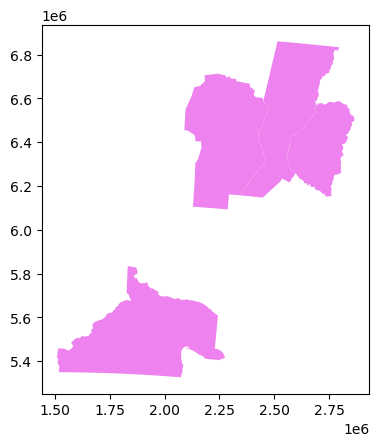

In [303]:
# see the neighbor
provinciasGDF2.iloc[w_rook.neighbors[0] ,].plot(facecolor='violet')

<Axes: >

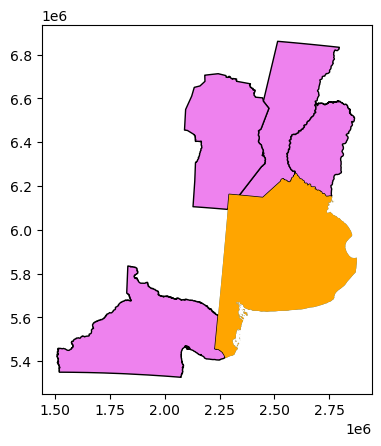

In [313]:
# see whole area
base=provinciasGDF2[provinciasGDF2.Provincia=="BUENOS AIRES"].plot()
provinciasGDF2.iloc[w_rook.neighbors[0] ,].plot(ax=base,facecolor="violet",edgecolor='k')
provinciasGDF2.head(1).plot(ax=base,facecolor="orange")

In [306]:
# how many
len(w_queen.neighbors[0])

4

In [307]:
# details
provinciasGDF2.iloc[w_queen.neighbors[0] ,]

,Provincia,geometry,Pais,IDH_2019,muertes_Tuberculosis,Pobreza_porcentaje,Pobreza_porcentaje_jc5
18,SANTA FE,"POLYGON Z ((2663631.362 6846895.383 0.000, 270...",Argentina,0.841,25,3.5,0
4,CORDOBA,"POLYGON Z ((2288373.932 6695803.079 0.000, 228...",Argentina,0.858,19,7.9,3
13,RIO NEGRO,MULTIPOLYGON Z (((2110903.688 5460168.313 0.00...,Argentina,0.843,8,7.0,2
6,ENTRE RIOS,"POLYGON Z ((2798505.825 6586816.825 0.000, 279...",Argentina,0.836,5,3.4,0


<Axes: >

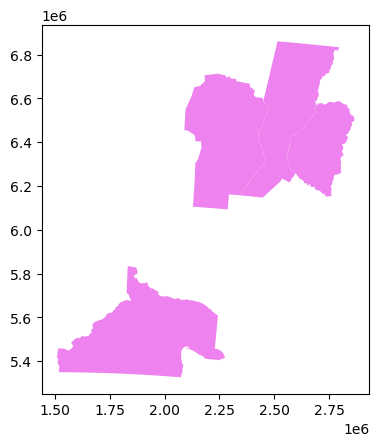

In [308]:
# see
provinciasGDF2.iloc[w_queen.neighbors[0] ,].plot(facecolor="violet")

<Axes: >

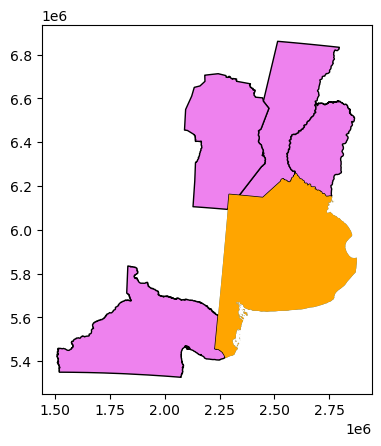

In [312]:
# whole area
base=provinciasGDF2[provinciasGDF2.Provincia=="BUENOS AIRES"].plot()
provinciasGDF2.iloc[w_queen.neighbors[0] ,].plot(ax=base,facecolor="violet",edgecolor='k')
provinciasGDF2.head(1).plot(ax=base,facecolor="orange")

<Axes: >

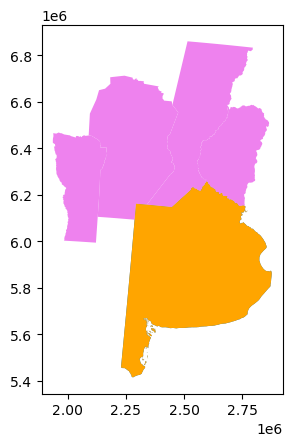

In [314]:
base=provinciasGDF2[provinciasGDF2.Provincia=="BUENOS AIRES"].plot()
provinciasGDF2.iloc[w_knn.neighbors[0],].plot(ax=base,facecolor="violet")
provinciasGDF2.head(1).plot(ax=base,facecolor="orange")

### Exercise 8

<div class="alert-success">
    
1. Compute the Moran's coefficient for **all** your numeric variables.
    
2. Make a scatter plot for each variable.
    
</div>

### Exercise 9

<div class="alert-success">
    
1. Compute the Local Moran for the variables in your data that have significant spatial correlation.
    
2. Create a new column for each of those variables, with a label ('0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier').

3. Prepare a map for each of the variables analyzed, showing the spots and outliers.
    
</div>